In [1]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sympy import symbols, diff, lambdify

#Py files
import MarketFunctions as NashMon
import resultsPriceandProfits as Res
import GridBR as Grid

In [2]:
from scipy.optimize import minimize

# Define constants
nb_players = 3
a_value = 2
mu_value = 1/4
c_value = 1

# Create the repeated value arrays
a = np.concatenate(([0], np.full(nb_players, a_value)))
c = np.full(nb_players, c_value)

# Define the profit function to be maximized
def negative_profit(p):
    return -Res.profit(p, a, mu_value, c)[0]

# Initial guess for the values of p
initial_p = np.ones(nb_players)

def price_constraint(p):
    return np.mean(p) - p[0]

constraints = [
    {'type': 'eq', 'fun': price_constraint}
]

# Use optimization to find the maximum profit
result = minimize(negative_profit, initial_p, bounds=[(0, None)] * nb_players, constraints=constraints, method='SLSQP')

max_profit = -result.fun
optimal_p = result.x

print("Collusion Profit:", max_profit)
print("Collusion Prices:", optimal_p)

Collusion Profit: 0.24999999957249275
Collusion Prices: [2.00002837 2.00002837 2.00002837]


In [33]:
import numpy as np

# Define constants
nb_players = 20
a_value = 2
mu_value = 1/4
c_value = 1

# Create the repeated value arrays
a = np.concatenate(([0], np.full(nb_players, a_value)))
c = np.full(nb_players, c_value)

# Define the individual profit function for a player i
def individual_profit(player_price, other_prices):
    return (player_price-c[0]) * np.exp(4 * (2 - player_price)) / (np.exp(4 * (2 - player_price)) + np.sum(np.exp(4 * (2 - other_prices))) + 1)

# Initialize all players with initial prices
current_prices = np.ones(nb_players)

# Calculate initial profits
current_profits = np.array([individual_profit(current_prices[i], np.delete(current_prices, i)) for i in range(nb_players)])

# Initialize a flag to track if any player's profit can be increased
profit_increased = True

# Define a small step for adjusting prices
price_step = 0.01

while profit_increased:
    profit_increased = False
    
    for i in range(nb_players):
        # Try increasing the price for player i
        new_prices = np.copy(current_prices)
        new_prices[i] += price_step
        
        # Calculate profits with the new prices
        new_profits = np.array([individual_profit(new_prices[j], np.delete(new_prices, j)) for j in range(nb_players)])
        
        # Check if any player's profit can be increased
        if new_profits[i] > current_profits[i]:
            current_prices = new_prices
            current_profits = new_profits
            profit_increased = True
            break

nash_profits = np.sum(current_profits)
nash_prices = current_prices


print("Nash Profits:", nash_profits)
print("Nash Equilibrium Prices:", nash_prices)


Nash Equilibrium Prices: [1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26 1.26
 1.26 1.26 1.26 1.26 1.26 1.26]
Nash Profits: 0.259328094946371


In [90]:
# Define constants
nb_players = 5
a_value = 2
mu_value = 1/4
c_value = 1

# Create the repeated value arrays
a = np.concatenate(([0], np.full(nb_players, a_value)))
c = np.full(nb_players, c_value)

# Function to maximize the individual profit of a player i
def maximize_individual_profit(player_idx, other_prices):
    def negative_individual_profit(player_price):
        player_prices = np.copy(other_prices)
        player_prices[player_idx] = player_price
        return -Res.profit(player_prices, a, mu_value, c)[player_idx]
    return negative_individual_profit

# Constraint function to keep all prices equal
def price_constraint(p):
    return np.mean(p) - p[0]

constraints = [
    {'type': 'eq', 'fun': price_constraint}
]

# Initial guess for the values of p
initial_p = np.ones(nb_players)  # Choose any value here

nash_prices = []

# Optimize each player's profit individually and calculate Nash profits
for i in range(nb_players):
    # Optimize the individual profit for player i while keeping others' prices fixed
    result = minimize(maximize_individual_profit(i, initial_p), initial_p[i], bounds=[(0, None)], method='SLSQP')
    nash_prices.append(result.x[0])

nash_profit = -result.fun
print("Nash Profits:", nash_profit)
print("Nash Prices:", nash_prices)

Nash Profits: 0.021040096644609554
Nash Prices: [1.2700583712076865, 1.2700583712076865, 1.2700583712076865, 1.2700583712076865, 1.2700583712076865]


In [83]:
import numpy as np
from scipy.optimize import minimize

def multiply_lists(lst1, lst2):
    return [elem1 * elem2 for elem1, elem2 in zip(lst1, lst2)]

def subtract_lists(lst1, lst2):
    return [elem1 - elem2 for elem1, elem2 in zip(lst1, lst2)]

def f(p, a, mu):
    prime_p = np.concatenate(([0], p))
    return np.exp((a - prime_p) / mu)

def quantity(p, a, mu):
    quant = f(p, a, mu)
    q = np.zeros(len(quant) - 1)
    for i in range(len(quant) - 1):
        q[i] = quant[i + 1] / sum(quant)
    return q

def profit(p, a, mu, c):
    return multiply_lists(quantity(p, a, mu), subtract_lists(p, c))

# Define constants
nb_players = 2
a_value = 2
mu_value = 1/4
c_value = 1

# Create the repeated value arrays
a = np.full(nb_players + 1, a_value)
c = np.full(nb_players, c_value)

# Function to maximize the individual profit of a player i
def maximize_individual_profit(player_idx, other_prices):
    def negative_individual_profit(player_price):
        player_prices = np.copy(other_prices)
        player_prices[player_idx] = player_price
        return -profit(player_prices, a, mu_value, c)[player_idx]
    return negative_individual_profit

# Constraint function to keep all prices equal
def price_constraint(p):
    return np.mean(p) - p[0]

constraints = [
    {'type': 'eq', 'fun': price_constraint}
]

# Initial guess for the values of p
initial_p = np.ones(nb_players) * 1.47 # Choose any value here

nash_prices = []
nash_profits = []

# Optimize each player's profit individually and calculate Nash profits
for i in range(nb_players):
    # Optimize the individual profit for player i while keeping others' prices fixed
    result = minimize(maximize_individual_profit(i, initial_p), initial_p[i], bounds=[(0, None)], method='SLSQP')
    nash_prices.append(result.x[0])
    nash_profits.append(-result.fun)  # Use -result.fun to get the positive profit value

print("Nash Prices:", nash_prices)
print("Nash Profits:", nash_profits)


Nash Prices: [1.2525453112218423, 1.2525453112218423]
Nash Profits: [0.0016686075330501556, 0.0016686075330501556]


In [88]:
import numpy as np
from scipy.optimize import minimize

def multiply_lists(lst1, lst2):
    return [elem1 * elem2 for elem1, elem2 in zip(lst1, lst2)]

def subtract_lists(lst1, lst2):
    return [elem1 - elem2 for elem1, elem2 in zip(lst1, lst2)]

def f(p, a, mu):
    prime_p = np.concatenate(([0], p))
    return np.exp((a - prime_p) / mu)

def quantity(p, a, mu):
    quant = f(p, a, mu)
    q = np.zeros(len(quant) - 1)
    for i in range(len(quant) - 1):
        q[i] = quant[i + 1] / sum(quant)
    return q

def profit(p, a, mu, c):
    return multiply_lists(quantity(p, a, mu), subtract_lists(p, c))

# Define constants
nb_players = 2
a_value = 2
mu_value = 1/4
c_value = 1

# Create the repeated value arrays
a = np.full(nb_players + 1, a_value)
c = np.full(nb_players, c_value)

# Function to maximize the profit of player 1 while considering others' prices fixed
def maximize_player1_profit(player1_price, player2_price):
    player_prices = [player1_price, player2_price]
    return -profit(player_prices, a[0], mu_value, c)[0]  # Use -profit(...) to maximize

# Initial guess for the price of player 1
initial_player1_price = 3.0  # Choose any value here

# Optimize player 1's profit while considering the price of player 2 fixed
result = minimize(lambda x: maximize_player1_profit(x, c[1]), initial_player1_price, bounds=[(0, None)], method='SLSQP')

player1_optimal_price = result.x[0]
player1_optimal_profit = -result.fun  # Use -result.fun to get the positive profit value

print("Player 1 Optimal Price:", player1_optimal_price)
print("Player 1 Optimal Profit:", player1_optimal_profit)


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [29]:
grid = Grid.GridBR()

In [30]:
grid.BestResponse()

[array([1.425     , 1.46357143, 1.50214286, 1.54071429, 1.57928571,
        1.61785714, 1.65642857, 1.695     , 1.73357143, 1.77214286,
        1.81071429, 1.84928571, 1.88785714, 1.92642857, 1.965     ]),
 array([1.46357143, 1.46357143, 1.50214286, 1.50214286, 1.50214286,
        1.54071429, 1.54071429, 1.57928571, 1.57928571, 1.61785714,
        1.61785714, 1.61785714, 1.65642857, 1.65642857, 1.65642857])]

In [83]:
display(grid()[0])

[0.20235601019856597, 0.21713740742565935, 0.2316386412236089, 0.24570146786716446, 0.2591870428044182, 0.27198068945268655, 0.2839946380975008, 0.29516874000710397, 0.3054693929501897, 0.3148870698520052, 0.32343291189579226, 0.33113484029124257, 0.33803357865827693, 0.34417888570777616, 0.3496261980418666]
[0.20298172776099663, 0.21897724815870273, 0.2348372401072762, 0.25037885652963243, 0.2654338323177788, 0.279855336776748, 0.2935228919085856, 0.306345097665866, 0.31826019670549177, 0.32923475270074043, 0.33926087446509673, 0.3483524841131812, 0.35654111292472945, 0.36387163732870653, 0.37039826652289926]
[0.20101964390149735, 0.2180078649132263, 0.2350305593251303, 0.25188660834298493, 0.26838267870238863, 0.28434186696539293, 0.299610787188031, 0.31406455263808897, 0.32760941177503844, 0.340183105519701, 0.3517532613050649, 0.3623142967975057, 0.37188336584000187, 0.3804958554877757, 0.3882008621957469]
[0.19677519967571905, 0.21450526961656383, 0.2324556994085616, 0.25041510565

,1.425000,1.463571,1.502143,1.540714,1.579286,1.617857,1.656429,1.695000,1.733571,1.772143,1.810714,1.849286,1.887857,1.926429,1.965000
1.425000,0.202356,0.217137,0.231639,0.245701,0.259187,0.271981,0.283995,0.295169,0.305469,0.314887,0.323433,0.331135,0.338034,0.344179,0.349626
1.463571,0.202982,0.218977,0.234837,0.250379,0.265434,0.279855,0.293523,0.306345,0.318260,0.329235,0.339261,0.348352,0.356541,0.363872,0.370398
1.502143,0.201020,0.218008,0.235031,0.251887,0.268383,0.284342,0.299611,0.314065,0.327609,0.340183,0.351753,0.362314,0.371883,0.380496,0.388201
1.540714,0.196775,0.214505,0.232456,0.250415,0.268172,0.285523,0.302285,0.318300,0.333440,0.347610,0.360749,0.372826,0.383838,0.393808,0.402773
1.579286,0.190588,0.208793,0.227410,0.246225,0.265017,0.283565,0.301658,0.319109,0.335754,0.351467,0.366152,0.379750,0.392235,0.403606,0.413890
1.617857,0.182814,0.201226,0.220234,0.239635,0.259204,0.278710,0.297924,0.316632,0.334641,0.351789,0.367948,0.383026,0.396968,0.409750,0.421378
1.656429,0.173811,0.192170,0.211298,0.231005,0.251072,0.271269,0.291355,0.311097,0.330276,0.348700,0.366208,0.382674,0.398012,0.412170,0.425131
1.695000,0.163919,0.181990,0.200978,0.220715,0.240998,0.261602,0.282285,0.302802,0.322917,0.342411,0.361093,0.378806,0.395430,0.410883,0.425122
1.733571,0.153454,0.171029,0.189644,0.209153,0.229377,0.250102,0.271095,0.292108,0.312893,0.333213,0.352852,0.371623,0.389376,0.405998,0.421416
1.772143,0.142697,0.159604,0.177642,0.196693,0.216602,0.237176,0.258194,0.279415,0.300588,0.321465,0.341811,0.361415,0.380098,0.397718,0.414173


In [84]:
display(grid()[1])

[0.20235601019856597, 0.21713740742565935, 0.2316386412236089, 0.24570146786716446, 0.2591870428044182, 0.27198068945268655, 0.2839946380975008, 0.29516874000710397, 0.3054693929501897, 0.3148870698520052, 0.32343291189579226, 0.33113484029124257, 0.33803357865827693, 0.34417888570777616, 0.3496261980418666]
[0.20298172776099663, 0.21897724815870273, 0.2348372401072762, 0.25037885652963243, 0.2654338323177788, 0.279855336776748, 0.2935228919085856, 0.306345097665866, 0.31826019670549177, 0.32923475270074043, 0.33926087446509673, 0.3483524841131812, 0.35654111292472945, 0.36387163732870653, 0.37039826652289926]
[0.20101964390149735, 0.2180078649132263, 0.2350305593251303, 0.25188660834298493, 0.26838267870238863, 0.28434186696539293, 0.299610787188031, 0.31406455263808897, 0.32760941177503844, 0.340183105519701, 0.3517532613050649, 0.3623142967975057, 0.37188336584000187, 0.3804958554877757, 0.3882008621957469]
[0.19677519967571905, 0.21450526961656383, 0.2324556994085616, 0.25041510565

,1.425,1.4635714285714285,1.5021428571428572,1.5407142857142857,1.5792857142857142,1.6178571428571429,1.6564285714285714,1.6949999999999998,1.7335714285714285,1.772142857142857,1.8107142857142857,1.8492857142857142,1.8878571428571427,1.9264285714285712,1.9649999999999999
1.425,0.202356,0.217137,0.231639,0.245701,0.259187,0.271981,0.283995,0.295169,0.305469,0.314887,0.323433,0.331135,0.338034,0.344179,0.349626
1.4635714285714285,0.202982,0.218977,0.234837,0.250379,0.265434,0.279855,0.293523,0.306345,0.318260,0.329235,0.339261,0.348352,0.356541,0.363872,0.370398
1.5021428571428572,0.201020,0.218008,0.235031,0.251887,0.268383,0.284342,0.299611,0.314065,0.327609,0.340183,0.351753,0.362314,0.371883,0.380496,0.388201
1.5407142857142857,0.196775,0.214505,0.232456,0.250415,0.268172,0.285523,0.302285,0.318300,0.333440,0.347610,0.360749,0.372826,0.383838,0.393808,0.402773
1.5792857142857142,0.190588,0.208793,0.227410,0.246225,0.265017,0.283565,0.301658,0.319109,0.335754,0.351467,0.366152,0.379750,0.392235,0.403606,0.413890
1.6178571428571429,0.182814,0.201226,0.220234,0.239635,0.259204,0.278710,0.297924,0.316632,0.334641,0.351789,0.367948,0.383026,0.396968,0.409750,0.421378
1.6564285714285714,0.173811,0.192170,0.211298,0.231005,0.251072,0.271269,0.291355,0.311097,0.330276,0.348700,0.366208,0.382674,0.398012,0.412170,0.425131
1.6949999999999998,0.163919,0.181990,0.200978,0.220715,0.240998,0.261602,0.282285,0.302802,0.322917,0.342411,0.361093,0.378806,0.395430,0.410883,0.425122
1.7335714285714285,0.153454,0.171029,0.189644,0.209153,0.229377,0.250102,0.271095,0.292108,0.312893,0.333213,0.352852,0.371623,0.389376,0.405998,0.421416
1.772142857142857,0.142697,0.159604,0.177642,0.196693,0.216602,0.237176,0.258194,0.279415,0.300588,0.321465,0.341811,0.361415,0.380098,0.397718,0.414173


In [31]:
display(grid()[2])

[array([1.425     , 1.46357143, 1.50214286, 1.54071429, 1.57928571,
        1.61785714, 1.65642857, 1.695     , 1.73357143, 1.77214286,
        1.81071429, 1.84928571, 1.88785714, 1.92642857, 1.965     ]),
 array([1.46357143, 1.46357143, 1.50214286, 1.50214286, 1.50214286,
        1.54071429, 1.54071429, 1.57928571, 1.57928571, 1.61785714,
        1.61785714, 1.61785714, 1.65642857, 1.65642857, 1.65642857])]

ValueError: Unknown format code 'd' for object of type 'float'

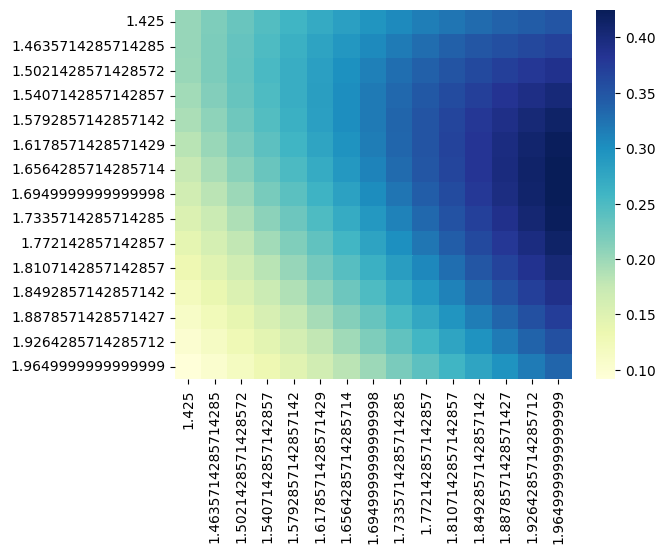

In [56]:
plt.figure()
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Prix du joueur j')
plt.ylabel('Prix du joueur i')
plt.title('Tableau des meilleures réponses du joueur i en fonction du prix du joueur j')

plt.show()

In [15]:
Res.quantity([1.47,1.47,1.47],[0,2,2,2],1/4)

array([0.32050957, 0.32050957, 0.32050957])

In [16]:
Res.profit([1.47,1.47,1.47],[0,2,2,2],1/4,[1,1,1])

[0.15063949855669678, 0.15063949855669678, 0.15063949855669678]

In [13]:
Res.profit([1.47,1.47],[0,2,2],1/4,[1,1])

[0.2216948057185365, 0.2216948057185365]

In [14]:
Res.profit([1.93,1.93],[0,2,2],1/4,[1,1])

[0.3374720541419311, 0.3374720541419311]

In [29]:
Res.partial_derivatives_of_profit(Res.profit, 3)

TypeError: can only concatenate list (not "tuple") to list

## 1) Nash and Bertrand prices

In [6]:
pN = NashMon.Balayage(NashMon.f_Nash, 0, 0, 0.001)
print(pN)

1.4729999999999486


In [7]:
pM = NashMon.Balayage(NashMon.f_Mon, 0, 0, 0.001)
print(pM)

1.9249999999998988


# Derivative test

In [19]:
partial_derivative = Der.partial_derivative_of_profit(Der.profit, [1.0, 2.0, 3.0], 0)
print("Dérivée partielle de profit par rapport à p[0]:", partial_derivative)

TypeError: profit() missing 1 required positional argument: 'c'

## 2) Q-learning (remplacer avec le code par class)

Attention, cette opération peut être longue
Pour 
- 100 rep : < 1sec
- 1000 rep : < 1 sec
- 10000 rep : env. 4 sec
- 100000 rep : env. 40 sec
- 1000000 rep : env. 7mn

In [12]:
results1 = Q.jeu(pN=pN,pM=pM,Xi=0.1,m=15, A=Q.A, S=Q.S, epsilon = Q.epsilon, beta=10**(-5), alpha = 0.1, delta = 0.95, initQ=Q.initQwithLargeConstantValue, updateQ=Q.updateQ, nb_iteration=100, get_next_action = Q.get_next_action,trouve_max=Q.trouve_max,pi1=Q.pi1, pi2=Q.pi2, find_index=Q.find_index)

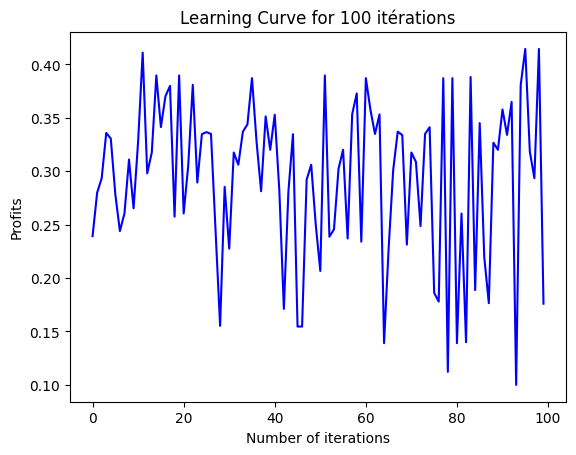

In [14]:
plt.title("Learning Curve for 100 itérations")
plt.plot(results1[1], results1[2], "b", label = "Simulation 1")
plt.xlabel('Number of iterations')
plt.ylabel('Profits')
plt.show()